# Project 4: Regression Analysis

#### Question 1: Load the dataset

In [63]:
import csv
from collections import defaultdict

# Key: 
# Week # 
# Day of Week 
# Backup Start Time - Hour of Day 
# Work-Flow-ID : work_flow_0 ... work_flow_4
# File Name
# Size of Backup (GB)
# Backup Time (hour)

datareader = csv.DictReader(open('network_backup_dataset.csv', 'r'), delimiter=',')

current_day = 0 # Track the day of week
file_sizes = defaultdict(list) # Record file sizes for each work flow ID

for row in datareader:
    if row['Day of Week'] != current_day: # New day
        current_day = row['Day of Week']
        for i in range(5):
            file_sizes[i].append(0)
        file_sizes[int(row['Work-Flow-ID'][-1])][-1] += float(row['Size of Backup (GB)'])
    else: # Same day
        file_sizes[int(row['Work-Flow-ID'][-1])][-1] += float(row['Size of Backup (GB)'])

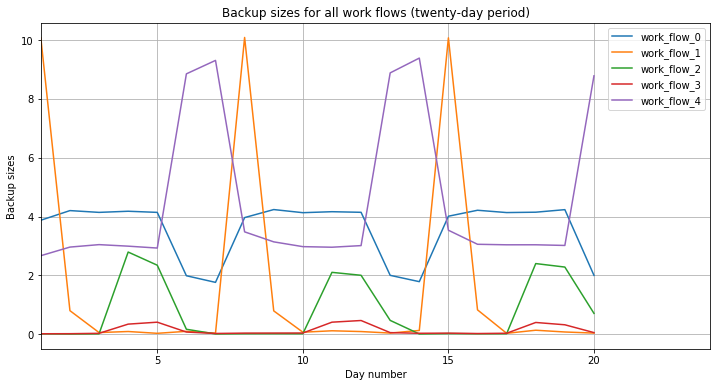

In [50]:
import matplotlib.pyplot as plt

# Plot 20 days
plt.figure(figsize=(12, 6))
plt.title("Backup sizes for all work flows (twenty-day period)")
for i in range(5):
    plt.plot(range(1, 21),file_sizes[i][0:20], label=('work_flow_%d' % i))
plt.xlabel('Day number')
plt.ylabel('Backup sizes')
plt.xlim(1, 24)
plt.legend()
plt.grid()
plt.savefig('Figures/Question1_a.png')  # Save the figure
plt.show()

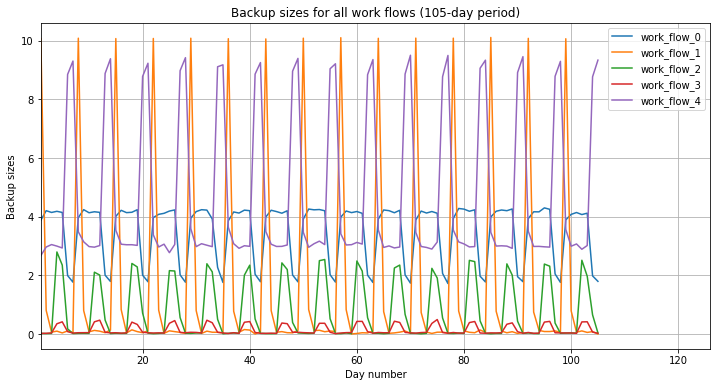

In [51]:
import matplotlib.pyplot as plt

# Plot 105 days
plt.figure(figsize=(12, 6))
plt.title("Backup sizes for all work flows (105-day period)")
for i in range(5):
    plt.plot(range(1, 106),file_sizes[i][0:106], label=('work_flow_%d' % i))
plt.xlabel('Day number')
plt.ylabel('Backup sizes')
plt.xlim(1, 126)
plt.legend()
plt.grid()
plt.savefig('Figures/Question1_b.png')  # Save the figure
plt.show()

#### Question 2: Predict

#### Feature sets and encoding schemes

In [5]:
import csv
import numpy as np

# Feature keys:
# Week # 
# Day of Week 
# Backup Start Time - Hour of Day 
# Work-Flow-ID : work_flow_0 ... work_flow_4
# File Name

# Target:
# Size of Backup (GB)

# Store all data
datareader = csv.DictReader(open('network_backup_dataset.csv', 'r'), delimiter=',') # Load data again
data_num = sum(1 for row in datareader) # Total number of samples
all_data_scalar = np.zeros((data_num, 6))

# For day of week
day_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Scalar encoding
line_num = 0
datareader = csv.DictReader(open('network_backup_dataset.csv', 'r'), delimiter=',') # Load data again
for row in datareader:
    all_data_scalar[line_num, 0] = int(row['Week #'])
    all_data_scalar[line_num, 1] = day_name.index(row['Day of Week']) + 1
    all_data_scalar[line_num, 2] = int(row['Backup Start Time - Hour of Day'])
    all_data_scalar[line_num, 3] = int(row['Work-Flow-ID'][-1])
    all_data_scalar[line_num, 4] = int(row['File Name'].split('_')[1])
    all_data_scalar[line_num, 5] = float(row['Size of Backup (GB)'])
    line_num += 1

#### (a) (i)

Train RMSE: 
0.103585393643
Test RMSE: 
0.103675847676


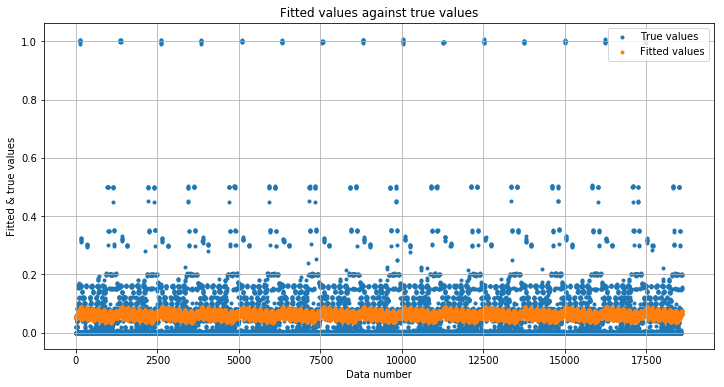

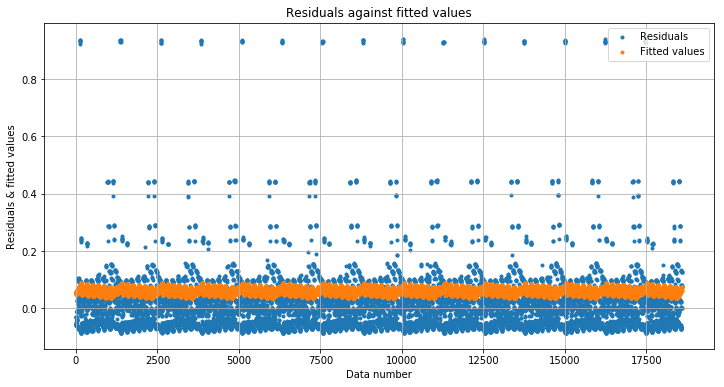

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Model
model = LinearRegression()

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, all_data_scalar[:, 0:5], all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = LinearRegression()
model_whole.fit(all_data_scalar[:, 0:5], all_data_scalar[:, 5])
predict_values = model_whole.predict(all_data_scalar[:, 0:5])

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_i_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_i_residuals.png')  # Save the figure
plt.show()

#### (a) (ii)

Train RMSE: 
0.103585393643
Test RMSE: 
0.103675847676


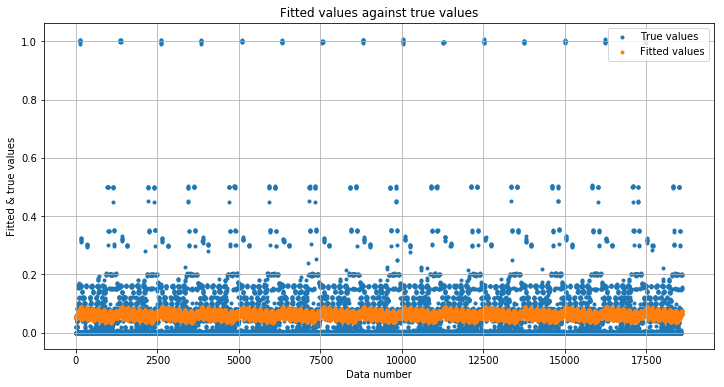

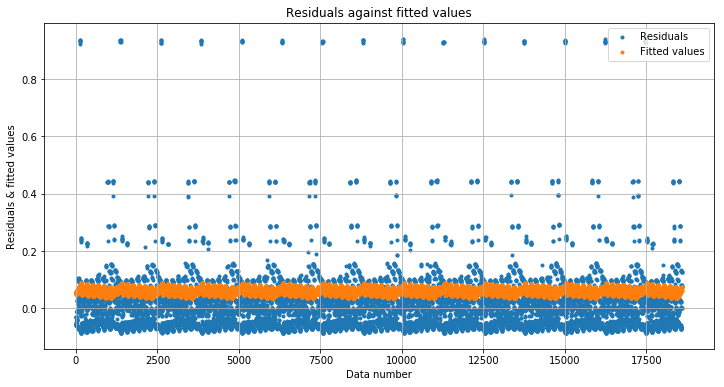

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Model
model = LinearRegression()
scaler = StandardScaler()
standard_data = scaler.fit_transform(all_data_scalar[:, 0:5])

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, standard_data, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = LinearRegression()
model_whole.fit(standard_data, all_data_scalar[:, 5])
predict_values = model_whole.predict(standard_data)

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_ii_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_ii_residuals.png')  # Save the figure
plt.show()

#### (a) (iii)

In [7]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

# Feature names
feature_names = ['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']
print('Features: ', feature_names, '\n')

# F regression
F, pval = f_regression(all_data_scalar[:, 0:5], all_data_scalar[:, 5])
print('\nF regression socres: ', F)
print('\nThree most important variables using f_regression: ')
for i in (np.argsort(F)[-3:]):
    print(feature_names[i])
    
# Mutual info
mi = mutual_info_regression(all_data_scalar[:, 0:5], all_data_scalar[:, 5])
print('\nMutual information regression socres: ', mi)
print('\nThree most important variables using mutual information regression: ')
for i in (np.argsort(mi)[-3:]):
    print(feature_names[i])

Features:  ['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name'] 


F regression socres:  [  8.45006257e-03   3.88163798e+01   1.50740934e+02   2.61386654e+01
   2.53200943e+01]

Three most important variables using f_regression: 
Work-Flow-ID
Day of Week
Backup Start Time - Hour of Day

Mutual information regression socres:  [ 0.00343335  0.23116219  0.30910131  0.76610851  0.76461217]

Three most important variables using mutual information regression: 
Backup Start Time - Hour of Day
File Name
Work-Flow-ID


Train RMSE: 
0.103585682142
Test RMSE: 
0.103670661831


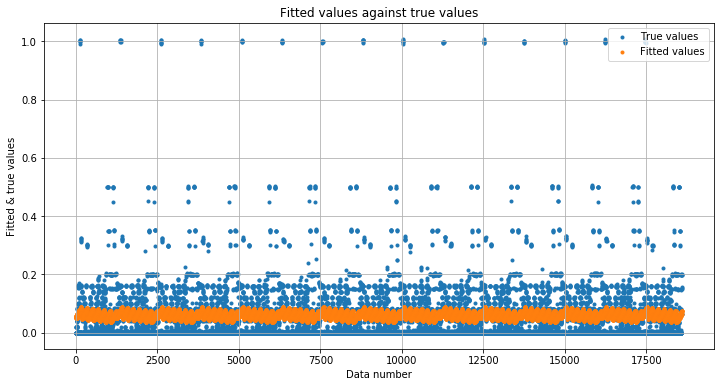

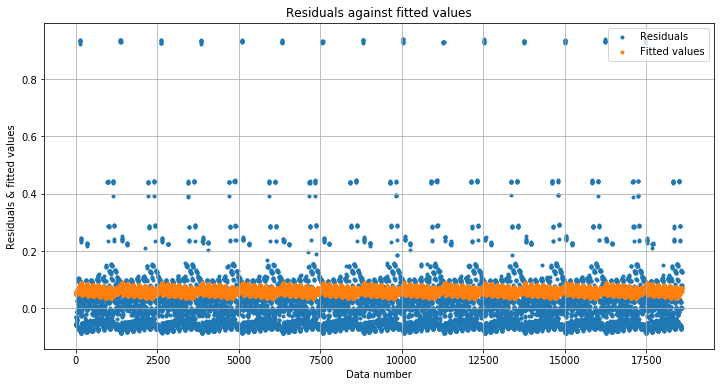

In [30]:
# Result using Work-Flow-ID File Name Week # (f_regression)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Model
model = LinearRegression()
scaler = StandardScaler()
used_data = all_data_scalar[:, np.argsort(F)[-3:]]

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, used_data, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = LinearRegression()
model_whole.fit(used_data, all_data_scalar[:, 5])
predict_values = model_whole.predict(used_data)

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_iii_f_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_iii_f_residuals.png')  # Save the figure
plt.show()

Train RMSE: 
0.103694528194
Test RMSE: 
0.103772293071


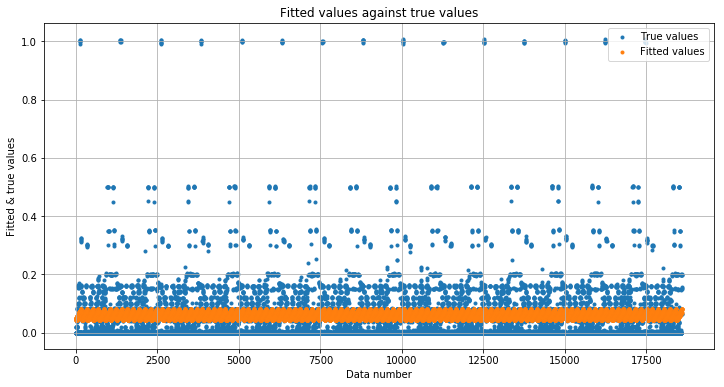

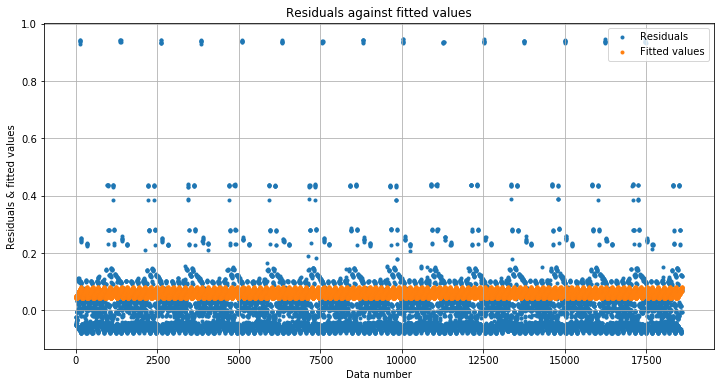

In [23]:
# Result using Backup Start Time - Hour of Day File Name Work-Flow-ID (mutual info)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Model
model = LinearRegression()
scaler = StandardScaler()
used_data = all_data_scalar[:, np.argsort(mi)[-3:]]

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, used_data, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = LinearRegression()
model_whole.fit(used_data, all_data_scalar[:, 5])
predict_values = model_whole.predict(used_data)

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_iii_mu_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_iii_mu_residuals.png')  # Save the figure
plt.show()

#### (a) (iv)

Train RMSE: 
[0.10358539364277801, 0.10358001893429987, 0.10214958101977546, 0.10236096535752824, 0.091338470040258621, 0.091337231461615043, 0.1021475657296249, 0.10235546668489652, 0.091333733969680322, 0.091332494847234602, 0.10090408487142001, 0.089754735938233465, 0.089753477462949524, 0.089950094482771831, 0.089948842684173247, 0.091337231461591742, 0.10090190985760661, 0.089753298363712194, 0.089752039826612284, 0.089945316790658203, 0.089944064321425779, 0.091332494847241777, 0.088337448618812278, 0.088336175967266631, 0.089753477462955394, 0.089948842684173719, 0.088335924248167066, 0.088334651345905443, 0.089752039826640234, 0.089944064321423711, 0.088336175967266811, 0.088334651345905263]
Test RMSE: 
[0.10367584767599031, 0.1143161440175253, 0.10223184702903818, 0.10246554440425953, 0.091497306190160221, 0.091498465269429105, 0.11136141337061428, 0.114609636644146, 0.094398477941524131, 0.094468712486018944, 0.10100030110654866, 0.089906779012020141, 0.089907956315623747, 0.

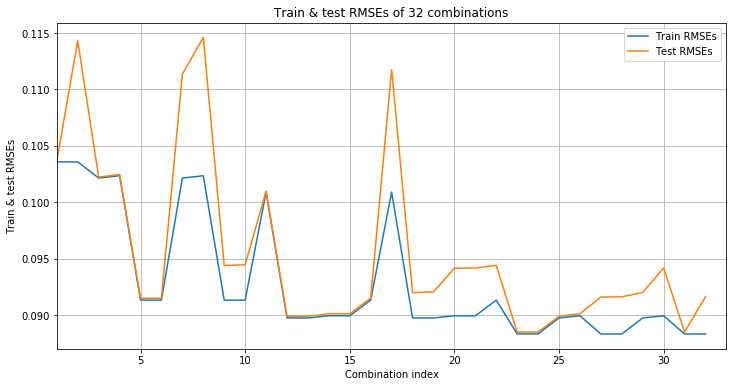

In [21]:
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Set the feature index
feature_idx = range(5)

# Get 32 combinations
all_combinations = []
for r in range(len(feature_idx) + 1):
    for subset in itertools.combinations(feature_idx, r):
        all_combinations.append(subset)

# RMSEs
train_RMSEs = []
test_RMSEs = []

# One hot encoding

for scheme in all_combinations:
    enc = OneHotEncoder(categorical_features=scheme)
    data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])
    
    # CV
    model = LinearRegression()
    scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
    scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)
    
    # RMSE
    train_RMSEs.append(np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10))
    test_RMSEs.append(np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10))
    
print('Train RMSE: ')
print(train_RMSEs)
print('Test RMSE: ')
print(test_RMSEs)

# Best combinations
min_RMSE = min(test_RMSEs)
print('\nMin test RMSE: ', min_RMSE)
print('Best combinations: ')
best_combination = all_combinations[np.argmin(test_RMSEs)]
print('One-Hot features: ', [feature_names[i] for i in best_combination])
print('Scalar features: ', [feature_names[i] for i in range(5) if i not in best_combination])

# Plot the RMSEs
plt.figure(figsize=(12, 6))
plt.title("Train & test RMSEs of 32 combinations")
plt.plot(range(1, 33), train_RMSEs, label='Train RMSEs')
plt.plot(range(1, 33), test_RMSEs, label='Test RMSEs')
plt.xlabel('Combination index')
plt.ylabel('Train & test RMSEs')
plt.xlim(1, 33)
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_iv.png')  # Save the figure
plt.show()

Train RMSE: 
0.0883374486188
Test RMSE: 
0.0885042609364


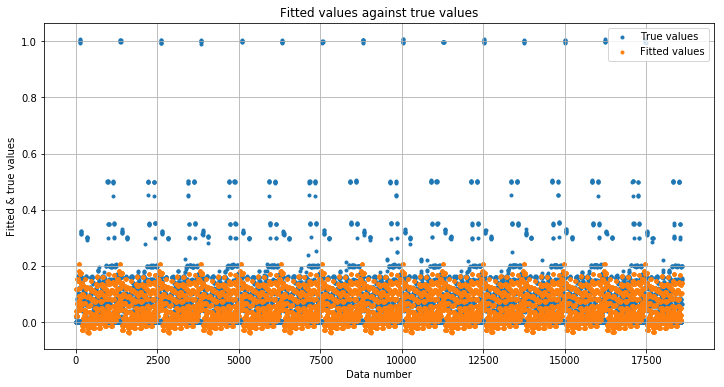

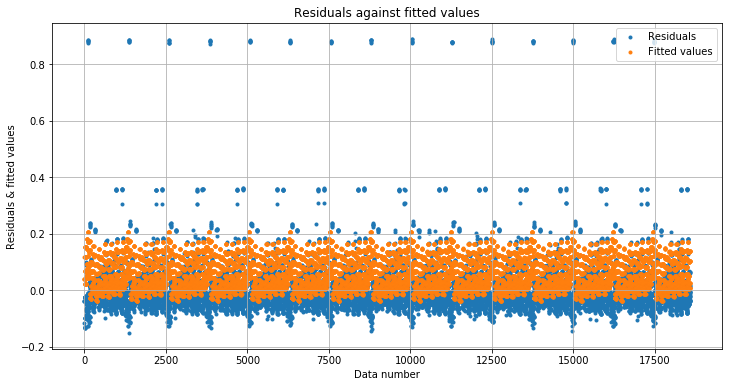

In [22]:
# Best model unregularized

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Model
model = LinearRegression()
enc = OneHotEncoder(categorical_features=best_combination)
data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = LinearRegression()
model_whole.fit(data_encoded, all_data_scalar[:, 5])
predict_values = model_whole.predict(data_encoded)

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_iv_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_iv_residuals.png')  # Save the figure
plt.show()

#### (a) (v) Ridge Regularizer

Train RMSE: 
[0.10358539364413825, 0.10358045023497016, 0.10214963851044852, 0.10236109043661945, 0.091338762741157598, 0.09133748173538106, 0.1021480137431553, 0.10235610446242577, 0.091334468306877123, 0.091332807578721809, 0.10090416225216316, 0.089754907173308959, 0.089754309816564057, 0.089950230257309916, 0.089948975258812625, 0.091338112180657363, 0.10090245865932207, 0.089753565020850218, 0.089752451137640035, 0.089945714430237744, 0.089944221397997612, 0.09133272102350086, 0.088337730445264384, 0.088336293769752855, 0.089753934264780066, 0.089948943348516122, 0.08833642312307427, 0.088334775070093324, 0.089752231646092237, 0.089944171341005533, 0.088336271324312432, 0.088334724075810625]
Test RMSE: 
[0.10367584529428608, 0.10526343446248541, 0.10223253288780634, 0.10246720375862754, 0.091496342890092411, 0.091498230560326368, 0.10349313582748676, 0.10410625191494849, 0.091608565750104079, 0.091829255468860102, 0.10099904943333413, 0.089907014861981507, 0.089907142962669939, 0.

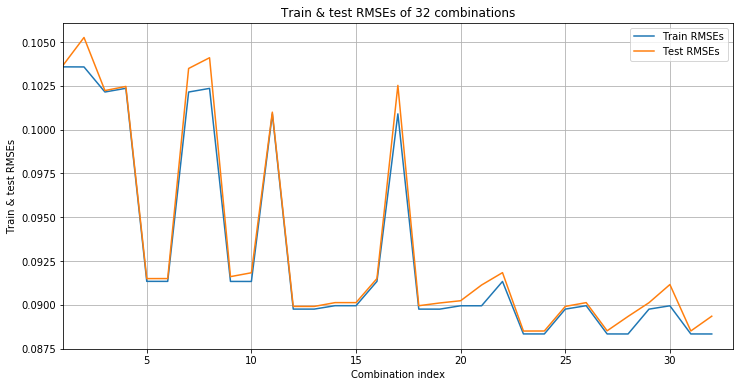

In [43]:
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Set the feature index
feature_idx = range(5)

# Get 32 combinations
all_combinations = []
for r in range(len(feature_idx) + 1):
    for subset in itertools.combinations(feature_idx, r):
        all_combinations.append(subset)

# RMSEs
train_RMSEs = []
test_RMSEs = []

# One hot encoding

for scheme in all_combinations:
    enc = OneHotEncoder(categorical_features=scheme)
    data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])
    
    # CV
    model = Ridge()
    scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
    scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)
    
    # RMSE
    train_RMSEs.append(np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10))
    test_RMSEs.append(np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10))
    
print('Train RMSE: ')
print(train_RMSEs)
print('Test RMSE: ')
print(test_RMSEs)

# Best combinations
min_RMSE = min(test_RMSEs)
print('\nMin test RMSE: ', min_RMSE)
print('Best combinations: ')
best_combination = all_combinations[np.argmin(test_RMSEs)]
print('One-Hot features: ', [feature_names[i] for i in best_combination])
print('Scalar features: ', [feature_names[i] for i in range(5) if i not in best_combination])

# Plot the RMSEs
plt.figure(figsize=(12, 6))
plt.title("Train & test RMSEs of 32 combinations")
plt.plot(range(1, 33), train_RMSEs, label='Train RMSEs')
plt.plot(range(1, 33), test_RMSEs, label='Test RMSEs')
plt.xlabel('Combination index')
plt.ylabel('Train & test RMSEs')
plt.xlim(1, 33)
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_v_ridge_32.png')  # Save the figure
plt.show()

Train RMSE: 
[0.088338101998537269, 0.088337842696472588, 0.088337597065523576, 0.088337861871871537, 0.088337925958661093, 0.088354560812642785]
Test RMSE: 
[0.088499452271056239, 0.088494493679582592, 0.088502988913615355, 0.088505391184376683, 0.088506800549178047, 0.088519785397985787]

Min test RMSE:  0.0884944936796
Best alpha:  0.01


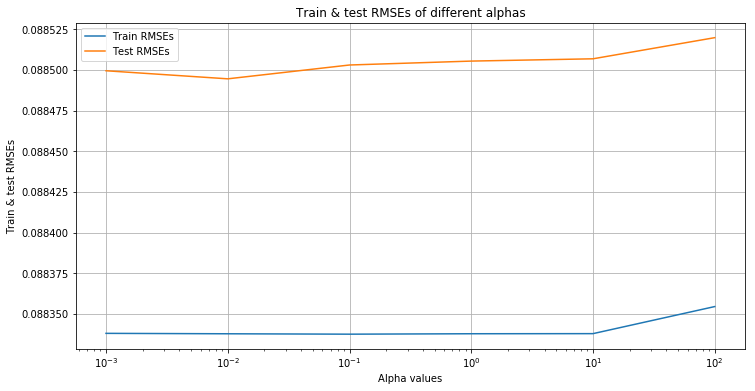

In [48]:
# Optimize

alphas = [10**i for i in range(-3,3)]

# RMSEs
train_RMSEs = []
test_RMSEs = []

# One hot encoding

for alpha in alphas:
    enc = OneHotEncoder(categorical_features=best_combination)
    data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])
    
    # CV
    model = Ridge(alpha=alpha)
    scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
    scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)
    
    # RMSE
    train_RMSEs.append(np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10))
    test_RMSEs.append(np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10))
    
print('Train RMSE: ')
print(train_RMSEs)
print('Test RMSE: ')
print(test_RMSEs)

# Best combinations
min_RMSE = min(test_RMSEs)
print('\nMin test RMSE: ', min_RMSE)
best_aplha = alphas[np.argmin(test_RMSEs)]
print('Best alpha: ', best_aplha)

# Plot the RMSEs
plt.figure(figsize=(12, 6))
plt.title("Train & test RMSEs of different alphas")
plt.semilogx(alphas, train_RMSEs, label='Train RMSEs')
plt.semilogx(alphas, test_RMSEs, label='Test RMSEs')
plt.xlabel('Alpha values')
plt.ylabel('Train & test RMSEs')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_v_ridge_optim.png')  # Save the figure
plt.show()

Train RMSE: 
0.0883377751532
Test RMSE: 
0.0884994115784


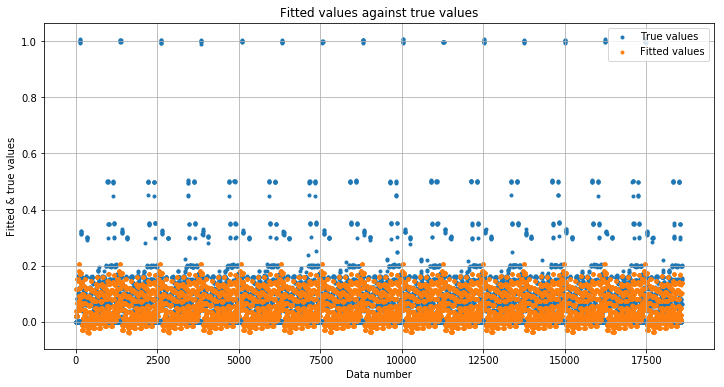

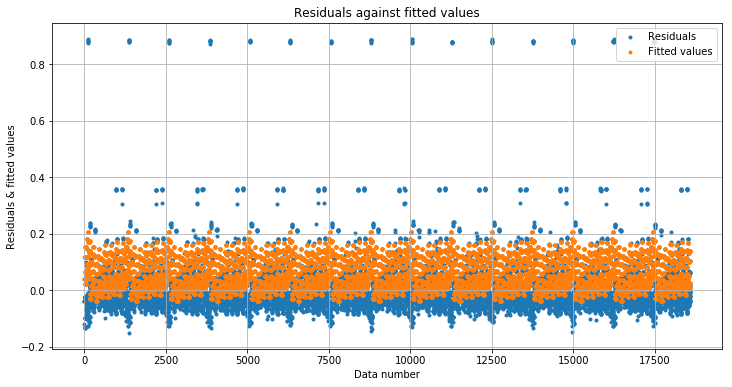

In [49]:
# Best model

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Model
model = Ridge(alpha=best_aplha)
enc = OneHotEncoder(categorical_features=best_combination)
data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = Ridge(alpha=best_aplha)
model_whole.fit(data_encoded, all_data_scalar[:, 5])
predict_values = model_whole.predict(data_encoded)

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_v_ridge_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_v_ridge_residuals.png')  # Save the figure
plt.show()

#### (a) (v) Lasso Regularizer

Train RMSE: 
[0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531]
Test RMSE: 
[0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419

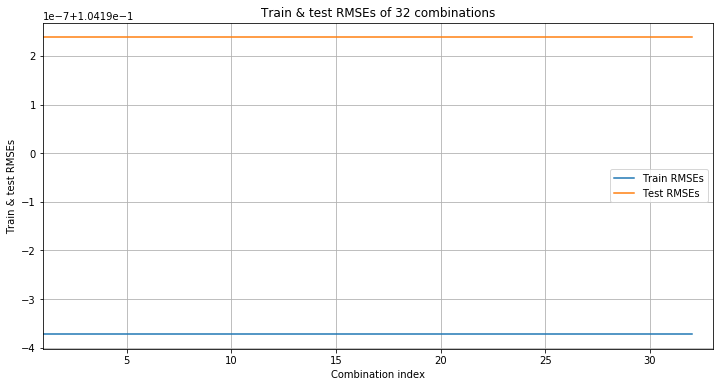

In [50]:
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Set the feature index
feature_idx = range(5)

# Get 32 combinations
all_combinations = []
for r in range(len(feature_idx) + 1):
    for subset in itertools.combinations(feature_idx, r):
        all_combinations.append(subset)

# RMSEs
train_RMSEs = []
test_RMSEs = []

# One hot encoding

for scheme in all_combinations:
    enc = OneHotEncoder(categorical_features=scheme)
    data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])
    
    # CV
    model = Lasso()
    scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
    scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)
    
    # RMSE
    train_RMSEs.append(np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10))
    test_RMSEs.append(np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10))
    
print('Train RMSE: ')
print(train_RMSEs)
print('Test RMSE: ')
print(test_RMSEs)

# Best combinations
min_RMSE = min(test_RMSEs)
print('\nMin test RMSE: ', min_RMSE)
print('Best combinations: ')
best_combination = all_combinations[np.argmin(test_RMSEs)]
print('One-Hot features: ', [feature_names[i] for i in best_combination])
print('Scalar features: ', [feature_names[i] for i in range(5) if i not in best_combination])

# Plot the RMSEs
plt.figure(figsize=(12, 6))
plt.title("Train & test RMSEs of 32 combinations")
plt.plot(range(1, 33), train_RMSEs, label='Train RMSEs')
plt.plot(range(1, 33), test_RMSEs, label='Test RMSEs')
plt.xlabel('Combination index')
plt.ylabel('Train & test RMSEs')
plt.xlim(1, 33)
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_v_lasso_32.png')  # Save the figure
plt.show()

Train RMSE: 
[0.10358539766724383, 0.10358584242083367, 0.10358922608548903, 0.10371354864610559, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531]
Test RMSE: 
[0.1036757888226148, 0.10367565103116869, 0.10367187599699264, 0.10378863601508743, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096]

Min test RMSE:  0.103671875997
Best alpha:  0.001


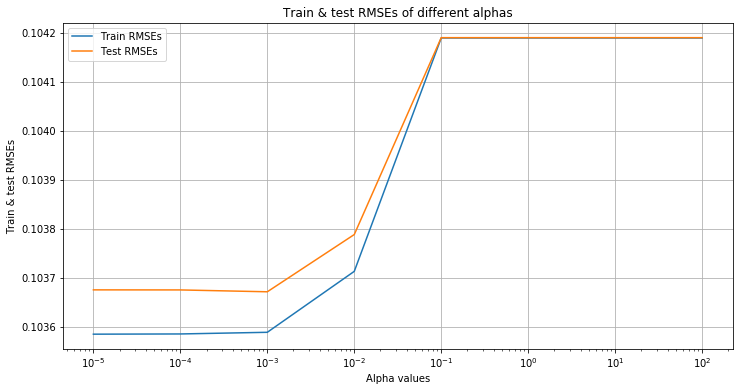

In [54]:
# Optimize

alphas = [10**i for i in range(-5,3)]

# RMSEs
train_RMSEs = []
test_RMSEs = []

# One hot encoding

for alpha in alphas:
    enc = OneHotEncoder(categorical_features=best_combination)
    data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])
    
    # CV
    model = Lasso(alpha=alpha)
    scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
    scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)
    
    # RMSE
    train_RMSEs.append(np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10))
    test_RMSEs.append(np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10))
    
print('Train RMSE: ')
print(train_RMSEs)
print('Test RMSE: ')
print(test_RMSEs)

# Best combinations
min_RMSE = min(test_RMSEs)
print('\nMin test RMSE: ', min_RMSE)
best_aplha = alphas[np.argmin(test_RMSEs)]
print('Best alpha: ', best_aplha)

# Plot the RMSEs
plt.figure(figsize=(12, 6))
plt.title("Train & test RMSEs of different alphas")
plt.semilogx(alphas, train_RMSEs, label='Train RMSEs')
plt.semilogx(alphas, test_RMSEs, label='Test RMSEs')
plt.xlabel('Alpha values')
plt.ylabel('Train & test RMSEs')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_v_Lasso_optim.png')  # Save the figure
plt.show()

Train RMSE: 
0.103589226085
Test RMSE: 
0.103671875997


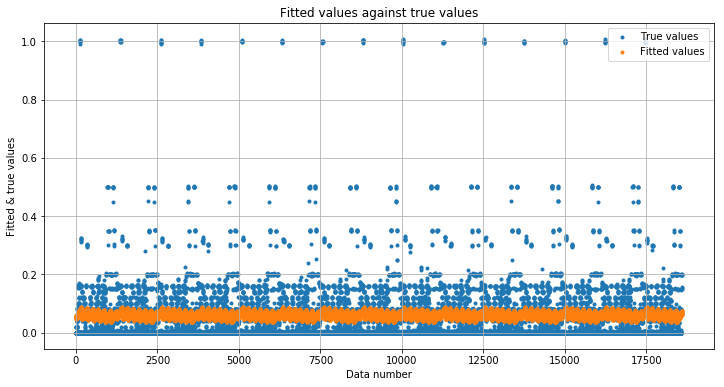

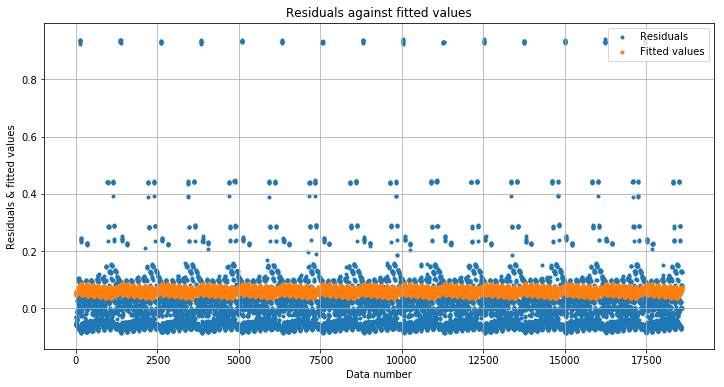

In [55]:
# Best model

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Model
model = Lasso(alpha=best_aplha)
enc = OneHotEncoder(categorical_features=best_combination)
data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = Lasso(alpha=best_aplha)
model_whole.fit(data_encoded, all_data_scalar[:, 5])
predict_values = model_whole.predict(data_encoded)

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_v_lasso_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_v_lasso_residuals.png')  # Save the figure
plt.show()

#### (a) (v) Elastic Net Regularizer

Train RMSE: 
[0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531]
Test RMSE: 
[0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419023788574096, 0.10419

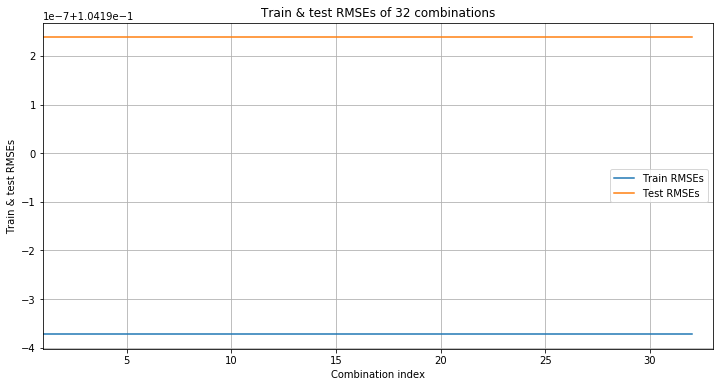

In [56]:
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Set the feature index
feature_idx = range(5)

# Get 32 combinations
all_combinations = []
for r in range(len(feature_idx) + 1):
    for subset in itertools.combinations(feature_idx, r):
        all_combinations.append(subset)

# RMSEs
train_RMSEs = []
test_RMSEs = []

# One hot encoding

for scheme in all_combinations:
    enc = OneHotEncoder(categorical_features=scheme)
    data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])
    
    # CV
    model = ElasticNet()
    scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
    scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)
    
    # RMSE
    train_RMSEs.append(np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10))
    test_RMSEs.append(np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10))
    
print('Train RMSE: ')
print(train_RMSEs)
print('Test RMSE: ')
print(test_RMSEs)

# Best combinations
min_RMSE = min(test_RMSEs)
print('\nMin test RMSE: ', min_RMSE)
print('Best combinations: ')
best_combination = all_combinations[np.argmin(test_RMSEs)]
print('One-Hot features: ', [feature_names[i] for i in best_combination])
print('Scalar features: ', [feature_names[i] for i in range(5) if i not in best_combination])

# Plot the RMSEs
plt.figure(figsize=(12, 6))
plt.title("Train & test RMSEs of 32 combinations")
plt.plot(range(1, 33), train_RMSEs, label='Train RMSEs')
plt.plot(range(1, 33), test_RMSEs, label='Test RMSEs')
plt.xlabel('Combination index')
plt.ylabel('Train & test RMSEs')
plt.xlim(1, 33)
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_v_ElasticNet_32.png')  # Save the figure
plt.show()

Train RMSE: 
[0.10358539365194275, 0.10358539787527228, 0.10358585488685629, 0.10358927628725317, 0.10371379712612387, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10358539373664748, 0.1035854111233306, 0.1035869455913493, 0.10359351236154878, 0.10376381801193731, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10358539391129185, 0.10358543339555602, 0.10358782882492899, 0.10360039995398196, 0.10383903830772162, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10358539417575169, 0.10358546471817288, 0.10358794259828372, 0.10361002390100171, 0.10393320308107583, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10358539453288525, 0.103585505070592, 0.10358808474060852, 0.10362238709026866, 0.10402734378394772, 0.10418962821705531, 0.10418962821705531, 0.10418962821705531, 0.10358539497941843, 0.10358555449715297, 0.10358825779133239, 0.10363749221658532, 0.1041403818837916, 0.10418962821705531, 0.10418962821705531, 0.10

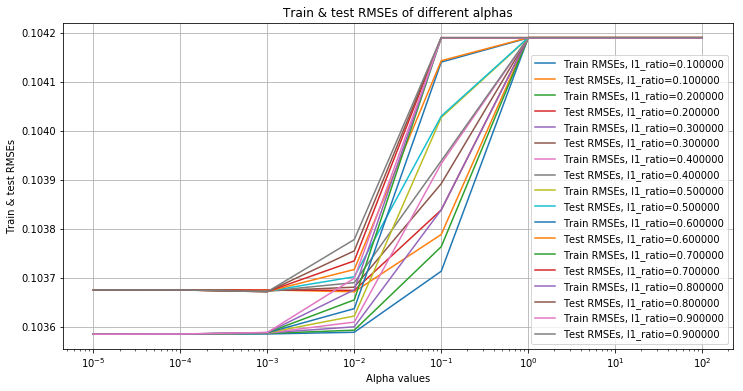

In [64]:
# Optimize

alphas = [10**i for i in range(-5,3)]
l1_ratios = np.arange(0.1,1,0.1)

# RMSEs
train_RMSEs = []
test_RMSEs = []

# One hot encoding

for l1_ratio in l1_ratios:
    for alpha in alphas:
        enc = OneHotEncoder(categorical_features=best_combination)
        data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])

        # CV
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
        scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

        # RMSE
        train_RMSEs.append(np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10))
        test_RMSEs.append(np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10))
    
print('Train RMSE: ')
print(train_RMSEs)
print('Test RMSE: ')
print(test_RMSEs)

# Best combinations
min_RMSE = min(test_RMSEs)
print('\nMin test RMSE: ', min_RMSE)
best_aplha = alphas[np.argmin(test_RMSEs) % len(alphas)]
print('Best alpha: ', best_aplha)
best_l1_ratio = l1_ratios[np.argmin(test_RMSEs) // len(alphas)]
print('Best l1_ratio: ', best_l1_ratio)

# Plot the RMSEs
plt.figure(figsize=(12, 6))
plt.title("Train & test RMSEs of different alphas")
for i in range(9):
    plt.semilogx(alphas, train_RMSEs[i*len(alphas):i*len(alphas)+len(alphas)], label=('Train RMSEs, l1_ratio=%f' % l1_ratios[i]))
    plt.semilogx(alphas, test_RMSEs[i*len(alphas):i*len(alphas)+len(alphas)], label=('Test RMSEs, l1_ratio=%f' % l1_ratios[i]))
plt.xlabel('Alpha values')
plt.ylabel('Train & test RMSEs')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_v_ElasticNet_optim.png')  # Save the figure
plt.show()

Train RMSE: 
0.103589276287
Test RMSE: 
0.103671891581


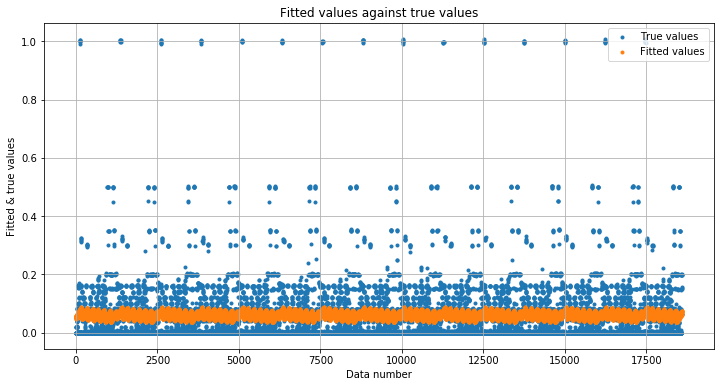

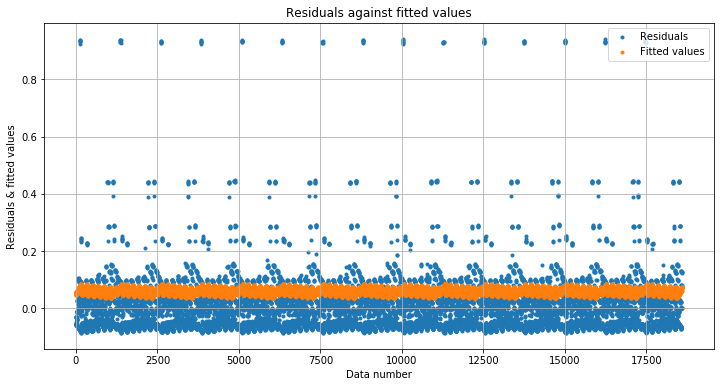

In [65]:
# Best model

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Model
model = ElasticNet(alpha=best_aplha, l1_ratio=best_l1_ratio)
enc = OneHotEncoder(categorical_features=best_combination)
data_encoded = enc.fit_transform(all_data_scalar[:, 0:5])

# CV
scoring = ['neg_mean_squared_error'] # neg_mean_squared_error returns the negated value of the metric
scores = cross_validate(model, data_encoded, all_data_scalar[:, 5], scoring=scoring, cv=10, return_train_score=True)

# RMSE
rmse_train = np.sqrt(- np.sum(scores['train_neg_mean_squared_error']) / 10)
rmse_test = np.sqrt(- np.sum(scores['test_neg_mean_squared_error']) / 10)

print('Train RMSE: ')
print(rmse_train)
print('Test RMSE: ')
print(rmse_test)

# Use the whole data set for training
model_whole = ElasticNet(alpha=best_aplha, l1_ratio=best_l1_ratio)
model_whole.fit(data_encoded, all_data_scalar[:, 5])
predict_values = model_whole.predict(data_encoded)

# Plot fitted values against true values
plt.figure(figsize=(12, 6))
plt.title("Fitted values against true values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5], marker='.', label='True values')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Fitted & true values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_v_ElasticNet_fitted.png')  # Save the figure
plt.show()

# Plot residuals against fitted values
plt.figure(figsize=(12, 6))
plt.title("Residuals against fitted values")
plt.scatter(range(1, data_num + 1), all_data_scalar[:, 5] - predict_values, marker='.', label='Residuals')
plt.scatter(range(1, data_num + 1), predict_values, marker='.', label='Fitted values')
plt.xlabel('Data number')
plt.ylabel('Residuals & fitted values')
plt.grid()
plt.legend()
plt.savefig('Figures/Question2_a_v_ElasticNet_residuals.png')  # Save the figure
plt.show()